Task 1: Music Recommendation System

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("music_dataset.csv")

In [3]:
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
numerical_features = [
    "popularity", "danceability", "energy", "valence", "acousticness", "instrumentalness", "tempo", "loudness"
]
dataset=dataset.dropna(subset=numerical_features)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(dataset[numerical_features])

## KMean Algorithm

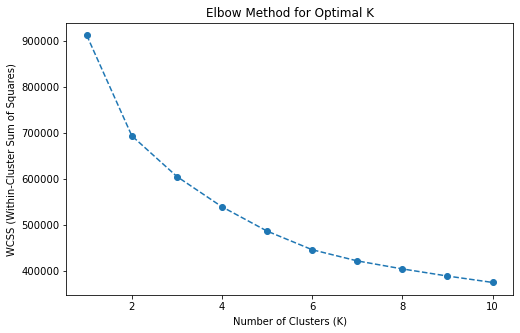

In [14]:
from sklearn.cluster import  KMeans
import matplotlib.pyplot as plt
# Using elbow method to find number of clusters
wcss = []
for i in range(1, 11):  # Checking for K=1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [19]:
# considering k value as 2 for replayed and non-replayed
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
dataset["cluster"] = kmeans.fit_predict(X_scaled)

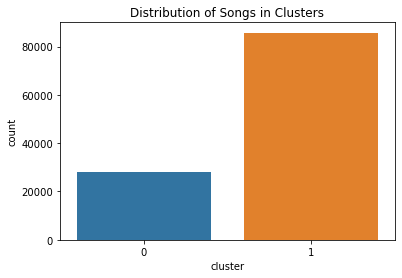

         popularity  danceability    energy   valence  acousticness  \
cluster                                                               
0         31.167150      0.472278  0.309539  0.319803      0.744548   
1         33.921137      0.597949  0.750738  0.524905      0.173327   

         instrumentalness       tempo   loudness  
cluster                                           
0                0.295177  109.819347 -14.154611  
1                0.110202  126.210557  -6.316113  


In [20]:
import seaborn as sns 
# Visualizing cluster distribution
sns.countplot(x=dataset["cluster"])
plt.title("Distribution of Songs in Clusters")
plt.show()

cluster_analysis = dataset.groupby("cluster")[numerical_features].mean()
print(cluster_analysis)


In [ ]:
# Cluster 0 has higher popularity, danceability, and energy which represents replayed songs.
# Cluster 1 has lower values, it represent less replayed songs.


Music Recommendation

In [22]:
# Function to recommend similar songs from the most replayed cluster
def recommend_songs(dataset, song_name, num_recommendations=4):
    song_cluster = dataset[dataset["track_name"] == song_name]["cluster"].values[0]
    
    # Get songs from the same cluster
    recommendations = dataset[dataset["cluster"] == song_cluster].sample(num_recommendations)
    
    return recommendations[["track_name", "artists", "popularity"]]

print(recommend_songs(dataset, "I'm Yours", num_recommendations=4))


          track_name                 artists  popularity
61446      HOT UP!!!  Shiritsu Ebisu Chugaku          21
77275  PQP - Ao vivo               Kamisa 10          48
83916    Greatest DJ                 twoloud          50
36264          Vapor                Triomphe          58
